In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from sklearn import preprocessing # scalar and PCA
from sklearn.decomposition import IncrementalPCA
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

import os
#Connecting the driver
from google.colab import drive

drive.mount('/content/drive/')

root_dir = '/content/drive/MyDrive/DAP/python_scripts'

Mounted at /content/drive/


In [5]:
df=pd.read_csv(os.path.join(root_dir,"training_dataset_final.csv"))

In [6]:
df.shape


(12384, 405)

In [7]:
df.head()

,disease,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,HIV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PneumocystisÂ cariniiÂ pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,accidentÂ cerebrovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,acquiredÂ immuno-deficiency syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA

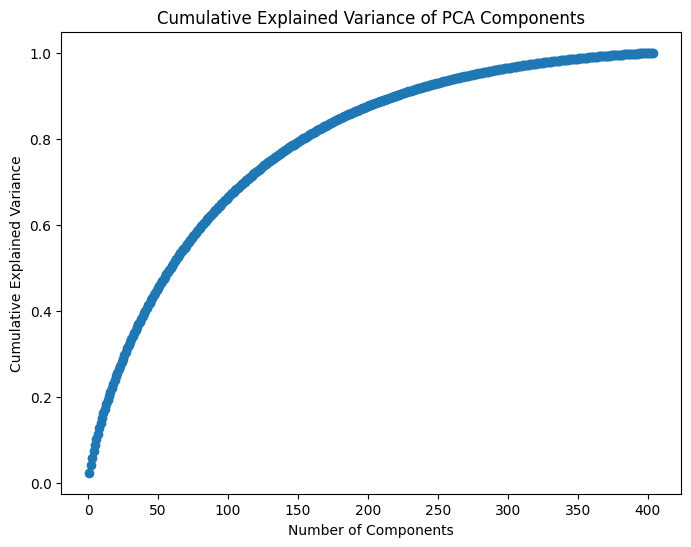

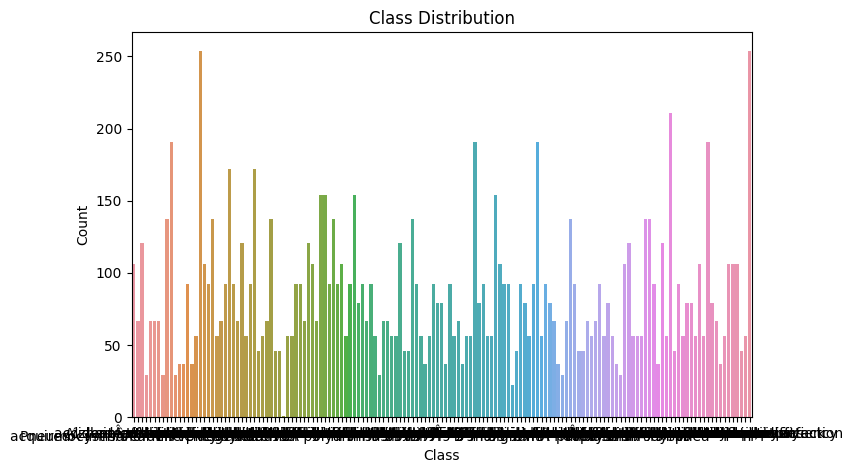

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv(os.path.join(root_dir,"training_dataset_final.csv"))
df =df.fillna(0)
# Separate features (X) and target variable (y)
X = df.drop(columns='disease')
y = df[['disease']]

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Incremental PCA
total_samples, total_features = X_scaled.shape
number_of_components = min(total_samples, total_features)

incremental_pca = IncrementalPCA(n_components=number_of_components)

# Process in batches
batch_size = total_samples
for i in range(0, X_scaled.shape[0], batch_size):
    X_batch_pca = X_scaled[i:i + batch_size]
    incremental_pca.partial_fit(X_batch_pca)

# Transform the data using Incremental PCA
X_pca = incremental_pca.transform(X_scaled)

# Visualize the explained variance ratio of PCA components
explained_variance_ratio = incremental_pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot Cumulative Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Convert y back to pandas DataFrame
y = pd.DataFrame(y, columns=['disease'])

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='disease', data=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Random Forest

Feature Importances:
                    Feature  Importance
254                    pain    0.016562
122                   fever    0.012427
206                  lesion    0.012068
328     shortness of breath    0.011826
217  mass of body structure    0.011145
..                      ...         ...
48                    bruit    0.000076
324               sedentary    0.000076
1             Murphy's sign    0.000073
4        abdominal bloating    0.000060
3             abdomen acute    0.000044

[404 rows x 2 columns]


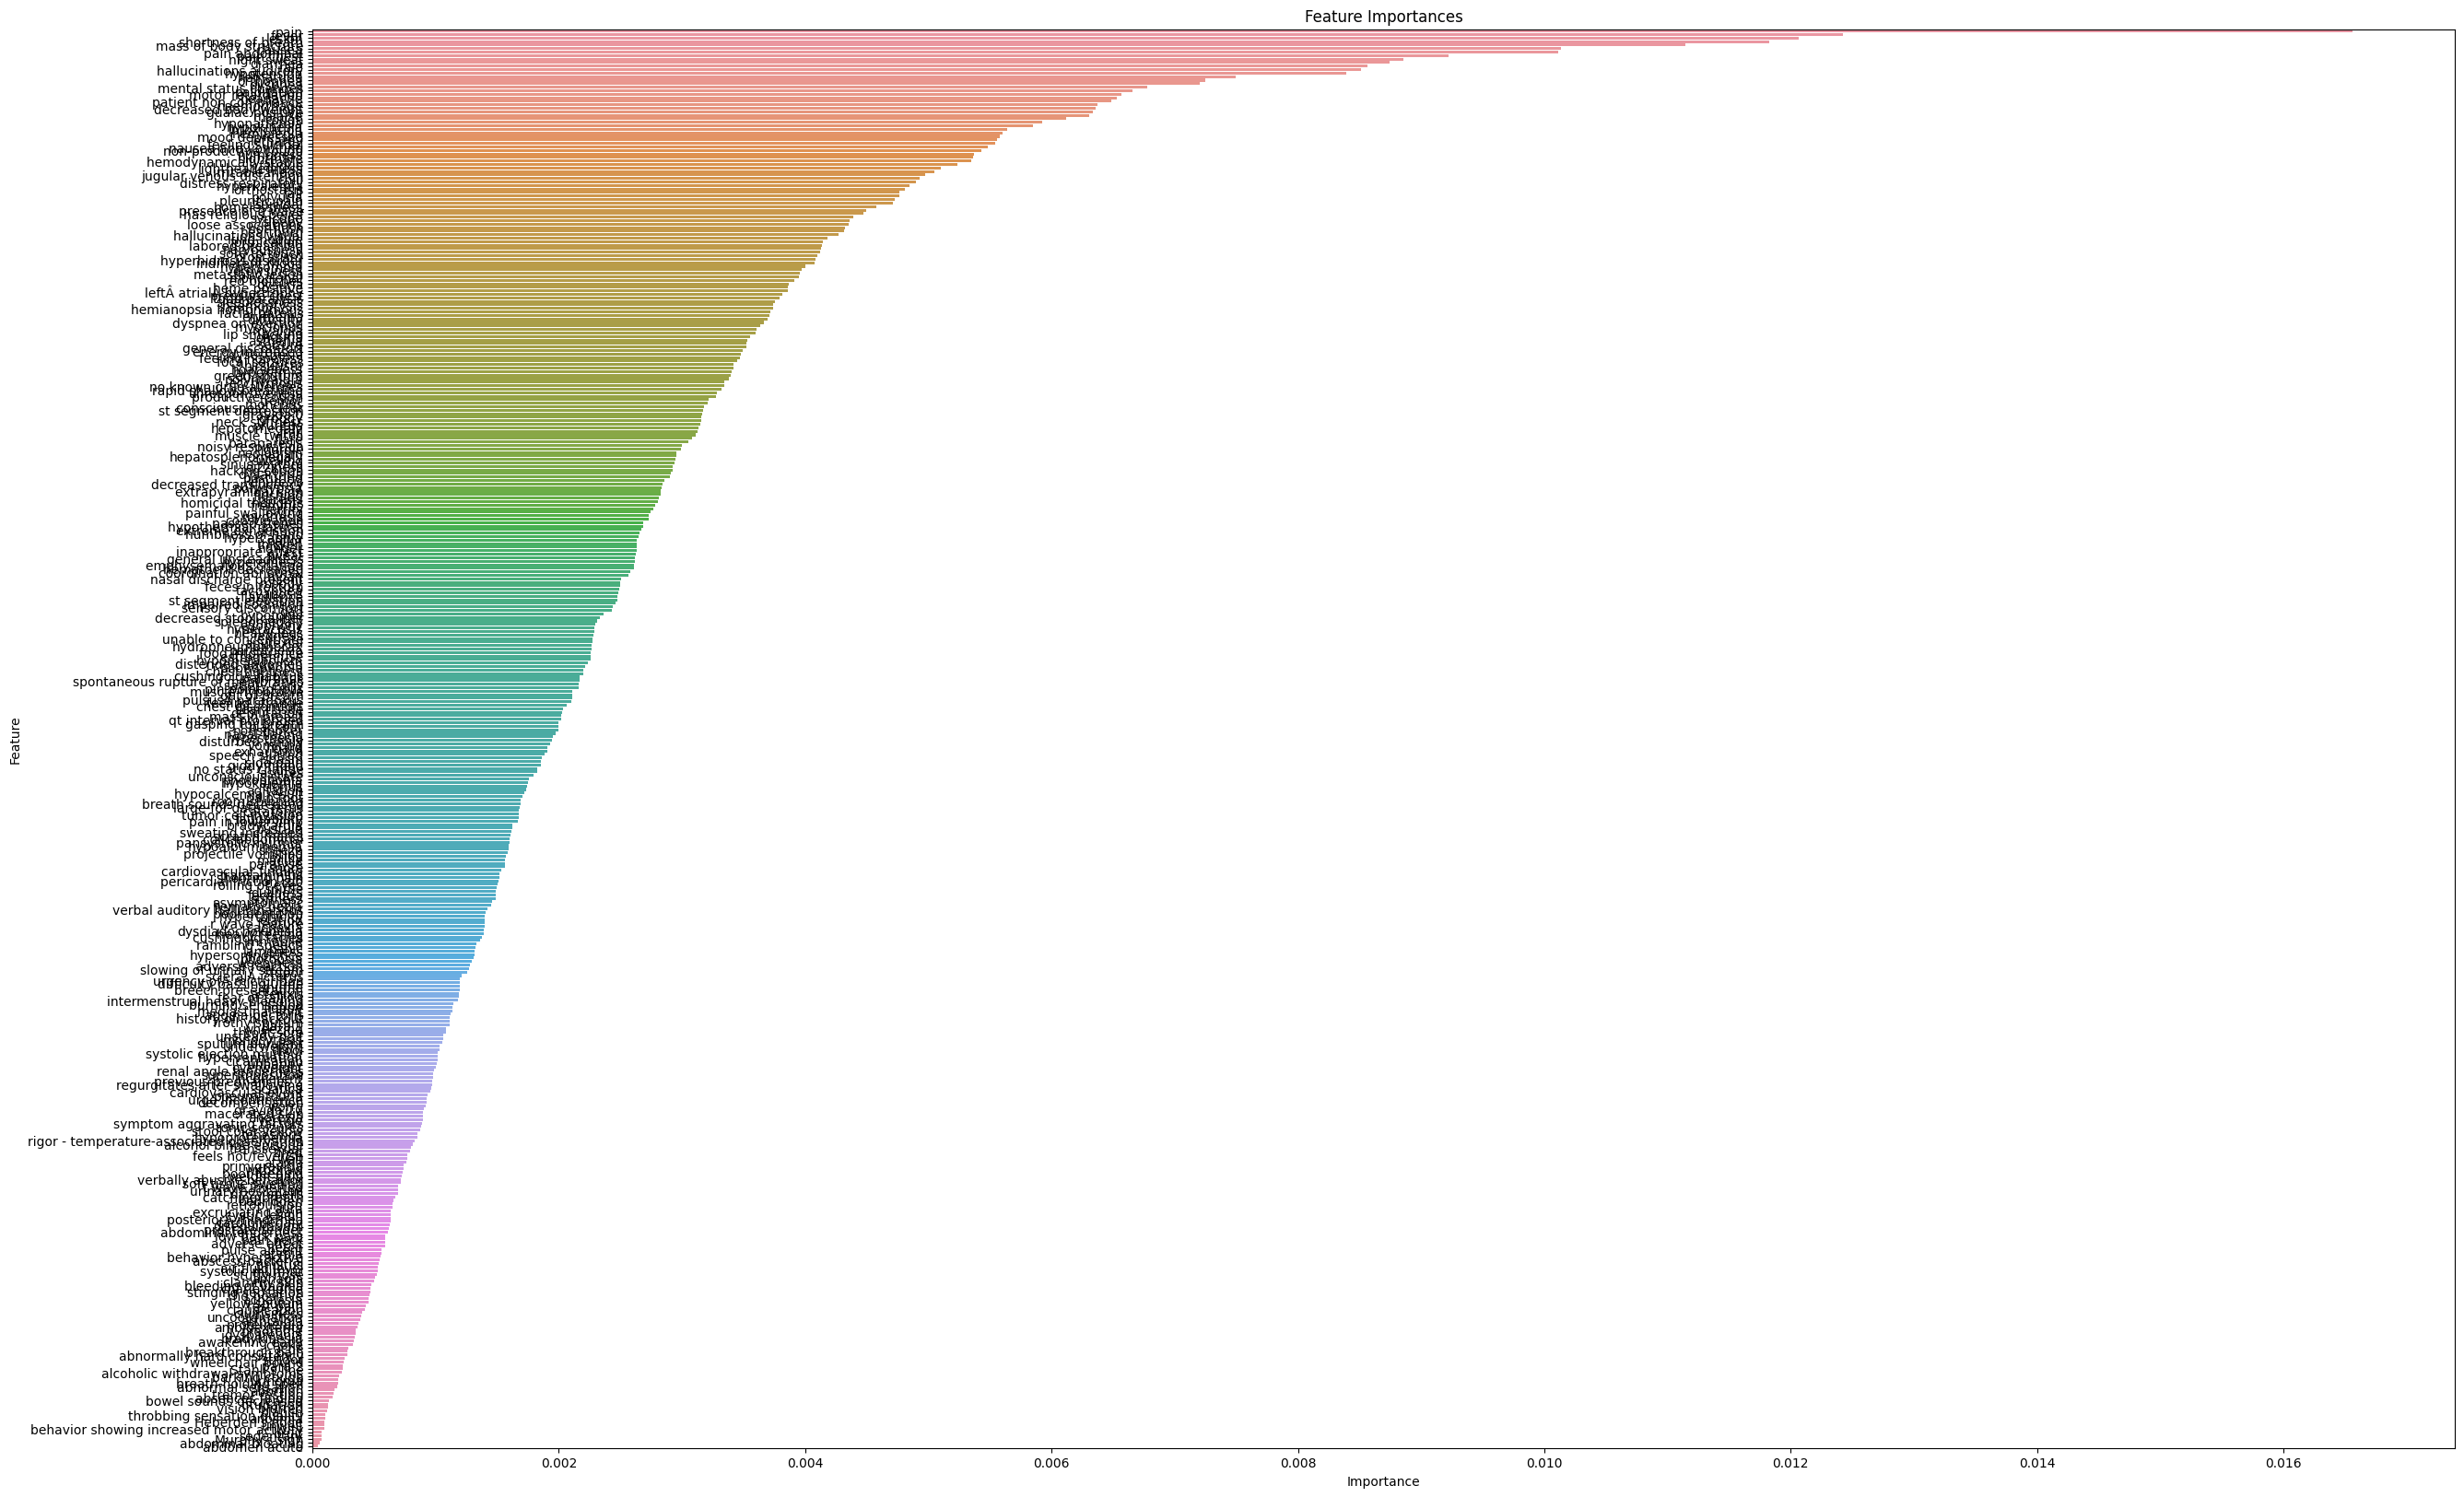

In [12]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Assuming df is your dataframe with the target variable 'Component'
X = df.drop('disease', axis=1)
y = df['disease']

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importances
print("Feature Importances:")
print(feature_importance_df)
feature_importance_df.to_csv(os.path.join(root_dir,"feature_importance_df.csv"))
# Plotting the feature importances (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.savefig('feature_importance.png', bbox_inches='tight')  # Adjust the filename as needed
plt.show()
plt.show()

# Low Variance

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
X = df.drop('disease', axis=1)  # Adjust 'disease' to your actual target variable name
y = df['disease']
thresholds = 0.023
variance_filter = VarianceThreshold(threshold=thresholds)
X_low_variance = variance_filter.fit_transform(X)
columns_mask = variance_filter.get_support()  # Get a boolean mask of selected features
selected_feature_names = X.columns[columns_mask]
df_low_variance = pd.DataFrame(X_low_variance, columns=selected_feature_names)
df_low_variance = pd.concat([df[['disease']], df_low_variance], axis=1)

In [15]:
len(df_low_variance)

12384

In [16]:
df_low_variance.to_csv(os.path.join(root_dir,"low_variance_features.csv"))